In [1]:
# Imports
import numpy as np
import subprocess

from IPython.display import Image

from collections import Counter

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Configurations
seed = 116

### Prepare data

In [3]:
# Generate artificial data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=8, n_redundant=3, n_repeated=2, random_state=seed)

In [4]:
# Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [5]:
# Check distribution of classes in each set
print("Train label distribution:")
print(Counter(y_train))

print("\nTest label distribution:")
print(Counter(y_test))

Train label distribution:
Counter({1: 401, 0: 399})

Test label distribution:
Counter({0: 105, 1: 95})


### Decision tree 

In [6]:
decision_tree = DecisionTreeClassifier(random_state=seed)

# Train
decision_tree.fit(X_train, y_train)

# Predict
decision_tree_y_pred  = decision_tree.predict(X_test)
decision_tree_y_pred_prob  = decision_tree.predict_proba(X_test)

# Evaluate
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_logloss = log_loss(y_test, decision_tree_y_pred_prob)

print("== Decision Tree ==")
print("Accuracy: {0:.2f}".format(decision_tree_accuracy))
print("Log loss: {0:.2f}".format(decision_tree_logloss))
print("Number of nodes created: {}".format(decision_tree.tree_.node_count))

== Decision Tree ==
Accuracy: 0.88
Log loss: 4.14
Number of nodes created: 89


In [7]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(decision_tree_y_pred[:5,])
print('\nPredicted probabilities:')
print(decision_tree_y_pred_prob[:5,])

True labels:
[1 0 1 0 0]

Predicted labels:
[0 1 0 0 0]

Predicted probabilities:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


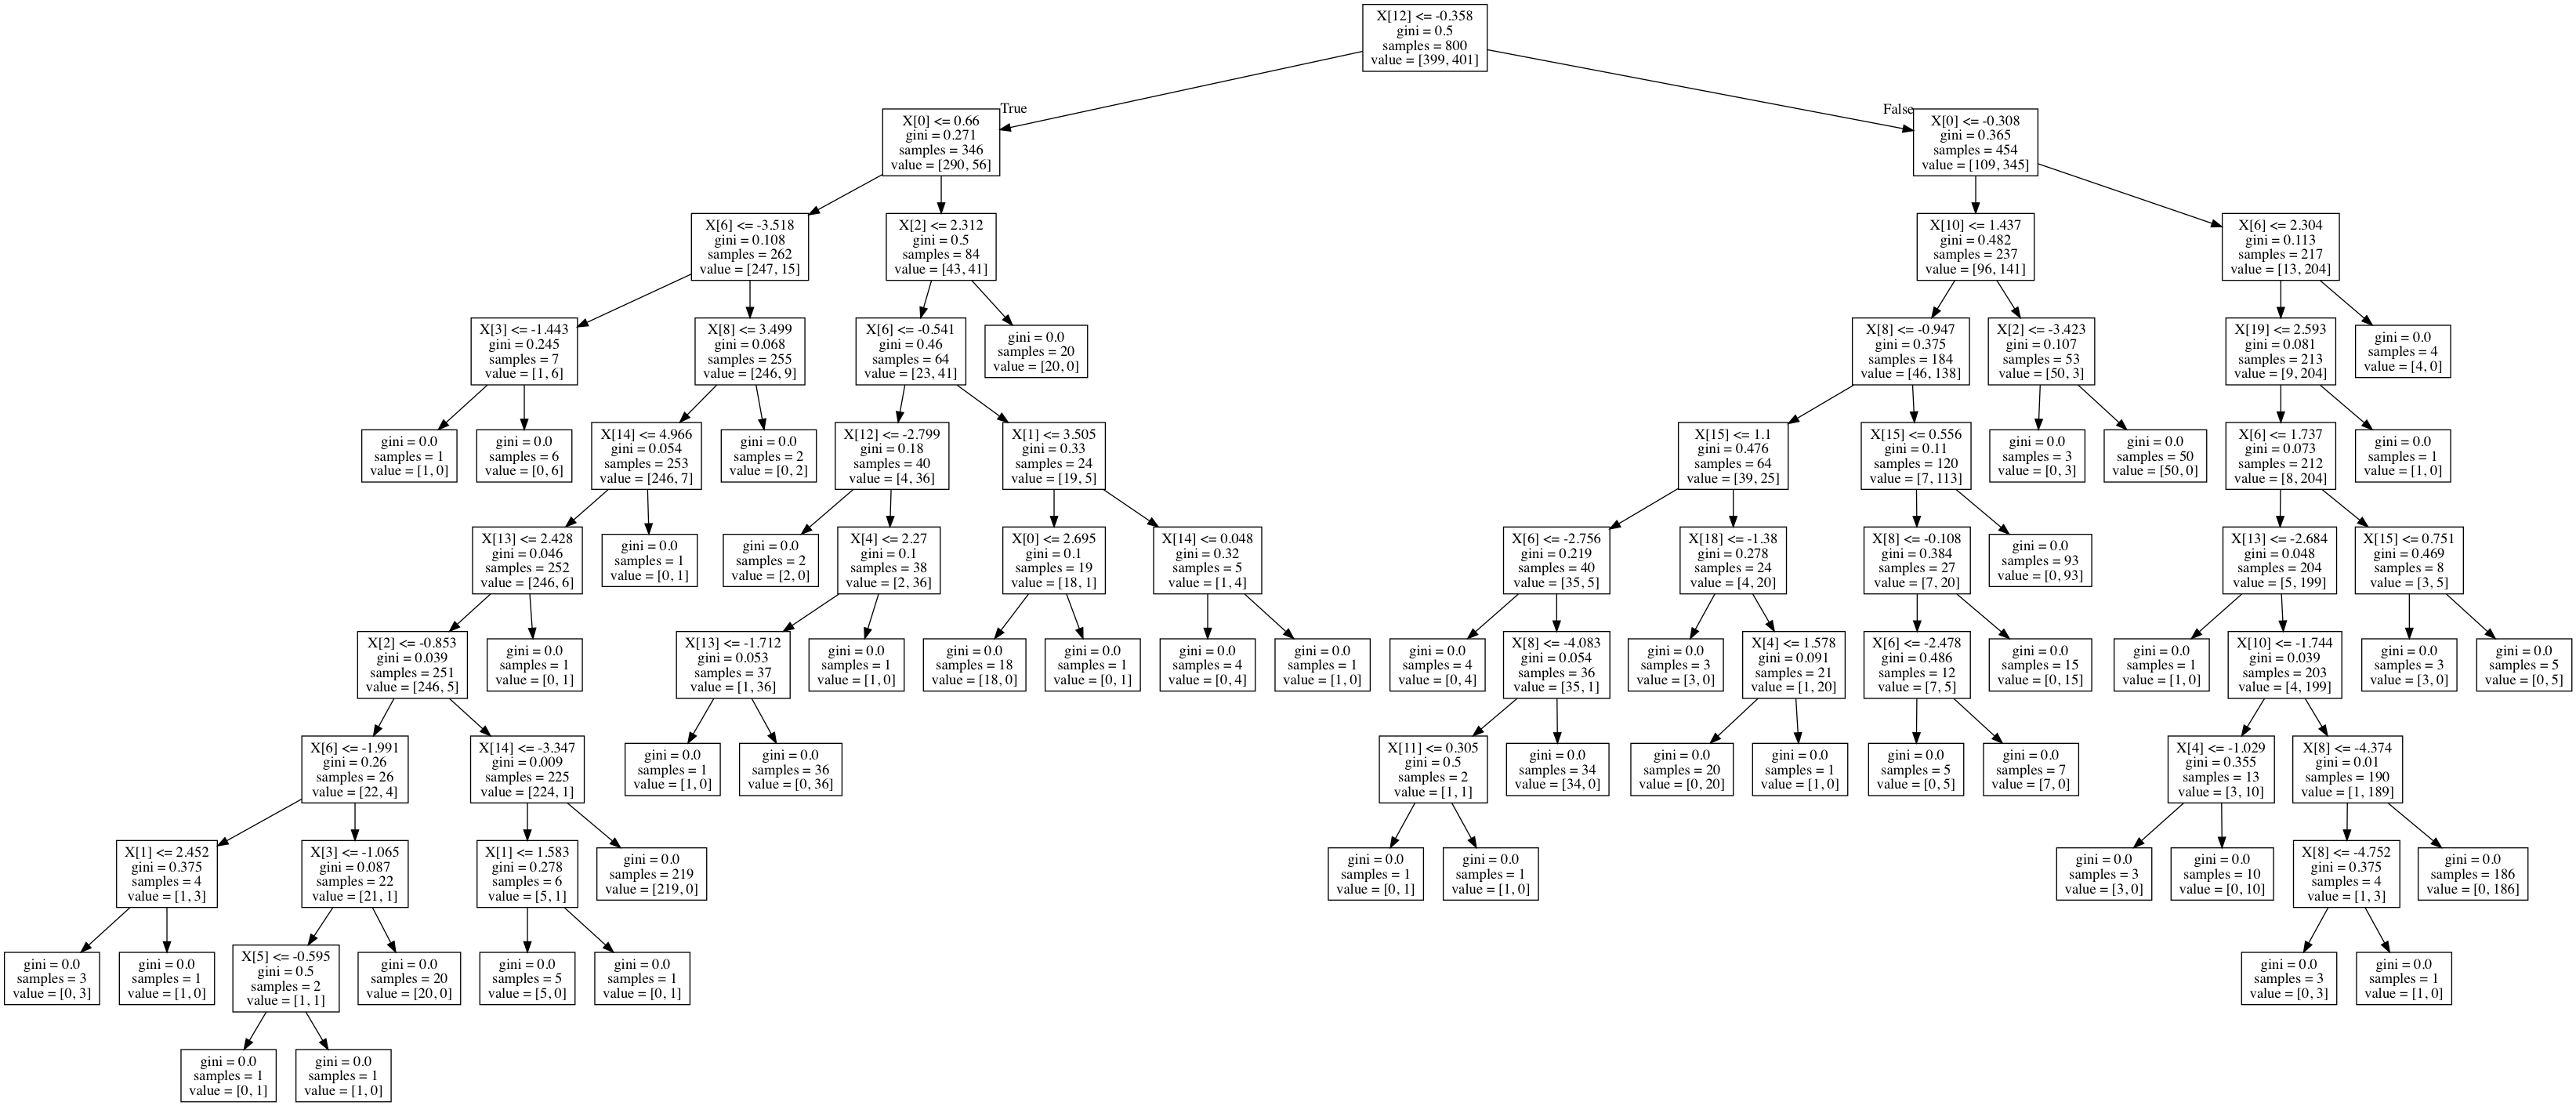

In [8]:
dt_viz_file = './images/dt.dot'
dt_png_file = './images/dt.png'

# Create visualization
export_graphviz(decision_tree, out_file=dt_viz_file)

# Convert to PNG
command = ["dot", "-Tpng", dt_viz_file, "-o", dt_png_file]
subprocess.check_call(command)

# Display image
Image(filename=dt_png_file)

### AdaBoost

In [9]:
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME',
    n_estimators=1000,
    random_state=seed)

# train classifier
adaboost.fit(X_train, y_train)

# calculate predictions
adaboost_y_pred = adaboost.predict(X_test)
adaboost_y_pred_prob = adaboost.predict_proba(X_test)

# evaluate
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_logloss = log_loss(y_test, adaboost_y_pred_prob)

print("== AdaBoost ==")
print("Accuracy: {0:.2f}".format(adaboost_accuracy))
print("Log loss: {0:.2f}".format(adaboost_logloss))

== AdaBoost ==
Accuracy: 0.92
Log loss: 0.68


In [10]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(adaboost_y_pred[:5,])
print('\nPredicted probabilities:')
print(adaboost_y_pred_prob[:5,])

True labels:
[1 0 1 0 0]

Predicted labels:
[1 0 0 0 0]

Predicted probabilities:
[[0.49176094 0.50823906]
 [0.50321066 0.49678934]
 [0.49613207 0.50386793]
 [0.49717035 0.50282965]
 [0.5010709  0.4989291 ]]


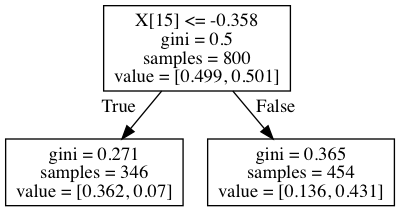

In [11]:
ada_t1 = adaboost.estimators_[0]
ada_t1_viz_file = './images/ada-t1.dot'
ada_t1_png_file = './images/ada-t1.png'

# create visualization
export_graphviz(ada_t1, out_file=ada_t1_viz_file)

# convert to PNG
command = ["dot", "-Tpng", ada_t1_viz_file, "-o", ada_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=ada_t1_png_file)

What's it's error and contribution into final ensemble

In [12]:
print("Error: {0:.2f}".format(adaboost.estimator_errors_[0]))
print("Tree importance: {0:.2f}".format(adaboost.estimator_weights_[0]))

Error: 0.21
Tree importance: 1.35


### Gradient Boosted Trees

In [13]:
gbc = GradientBoostingClassifier(
    max_depth=1,
    n_estimators=1000,
    warm_start=True,
    random_state=seed)
gbc.fit(X_train, y_train)

# make predictions
gbc_y_pred = gbc.predict(X_test)
gbc_y_pred_prob = gbc.predict_proba(X_test)

# calculate log loss
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
gbc_logloss = log_loss(y_test, gbc_y_pred_prob)

print("== Gradient Boosting ==")
print("Accuracy: {0:.2f}".format(gbc_accuracy))
print("Log loss: {0:.2f}".format(gbc_logloss))

== Gradient Boosting ==
Accuracy: 0.92
Log loss: 0.19


In [14]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(gbc_y_pred[:5,])
print('\nPredicted probabilities:')
print(gbc_y_pred_prob[:5,])

True labels:
[1 0 1 0 0]

Predicted labels:
[1 0 0 0 0]

Predicted probabilities:
[[0.10147304 0.89852696]
 [0.88685276 0.11314724]
 [0.89684334 0.10315666]
 [0.84501223 0.15498777]
 [0.97562055 0.02437945]]


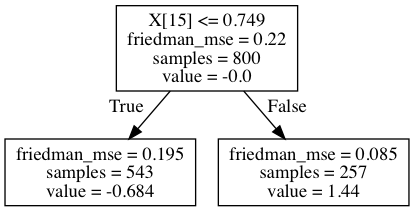

In [15]:
gbc_t1 = gbc.estimators_[2][0]
gbc_t1_viz_file = './images/gbc-t1.dot'
gbc_t1_png_file = './images/gbc-t1.png'

# create visualization
export_graphviz(gbc_t1, out_file=gbc_t1_viz_file)

# convert to PNG
command = ["dot", "-Tpng", gbc_t1_viz_file, "-o", gbc_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=gbc_t1_png_file)